In [ ]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geopandas
import numpy as np

myshpfile = geopandas.read_file('resource/LSMD_ADM_SECT_UMD_전북특별자치도/LSMD_ADM_SECT_UMD_52_202502.shp', encoding='euc-kr')
myshpfile.set_crs(epsg=5186, inplace= True)
myshpfile = myshpfile.to_crs(epsg=4326)
myshpfile.to_file('output/emd.geojson', driver='GeoJSON', encoding='euc-kr')
df_bdong = gpd.read_file('output/emd.geojson', encoding='euc-kr')
df_bdong['EMD_CD'] = df_bdong['EMD_CD'].astype(str)
df_bdong['EMD_CD'] = df_bdong['EMD_CD']+"00"
df_bdong

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
0,5211113300,52110,평화동2가,16039,"POLYGON ((127.11444 35.78814, 127.11444 35.788..."
1,5211113700,52110,삼천동1가,16038,"POLYGON ((127.10839 35.79847, 127.10839 35.798..."
2,5211112000,52110,중노송동,15346,"POLYGON ((127.14828 35.82895, 127.14828 35.829..."
3,5211312600,52110,성덕동,12145,"POLYGON ((127.02944 35.87611, 127.02966 35.876..."
4,5211311600,52110,호성동1가,12466,"POLYGON ((127.16795 35.85619, 127.16778 35.856..."
...,...,...,...,...,...
405,5280033000,52800,행안면,642,"POLYGON ((126.71829 35.75519, 126.7183 35.7551..."
406,5280032000,52800,동진면,3234,"POLYGON ((126.69595 35.74168, 126.69595 35.741..."
407,5280036000,52800,변산면,3542,"MULTIPOLYGON (((126.45827 35.63658, 126.45843 ..."
408,5280039000,52800,상서면,3218,"MULTIPOLYGON (((126.69776 35.70035, 126.69769 ..."


In [ ]:
csv_lines = []
with open('resource/법정동코드 전체자료.txt', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        arr = line.replace(" ","\t").split("\t")
        #print(arr)
        if len(arr) < 5:
            pass
        else:
            if len(arr) == 7:
                pass
            elif len(arr) == 6:
                csv_lines.append(arr)
            else:
                
                arr.insert(3,"")
                csv_lines.append(arr)
            

df_bupjungdong = pd.DataFrame(csv_lines, columns=['법정동코드', '시','군구','읍면','동','폐지여부'])
df_bupjungdong['법정동코드'] = df_bupjungdong['법정동코드'].astype(str)
df_bupjungdong

,법정동코드,시,군구,읍면,동,폐지여부
0,1111010100,서울특별시,종로구,,청운동,존재\n
1,1111010200,서울특별시,종로구,,신교동,존재\n
2,1111010300,서울특별시,종로구,,궁정동,존재\n
3,1111010400,서울특별시,종로구,,효자동,존재\n
4,1111010500,서울특별시,종로구,,창성동,존재\n
...,...,...,...,...,...,...
48339,5280042024,전북특별자치도,부안군,위도면,대리,존재\n
48340,5280042025,전북특별자치도,부안군,위도면,거륜리,존재\n
48341,5280042026,전북특별자치도,부안군,위도면,식도리,존재\n
48342,5280042027,전북특별자치도,부안군,위도면,상왕등리,존재\n


In [10]:
result_df = pd.merge(df_bdong, df_bupjungdong, left_on=df_bdong['EMD_CD'], right_on=df_bupjungdong['법정동코드'], how='left')
result_df = result_df.drop(['key_0','법정동코드'], axis=1)
result_df = result_df[result_df['군구'] == '전주시']
result_df['value'] = np.random.rand(len(result_df))
result_df

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry,시,군구,읍면,동,폐지여부,value
0,5211113300,52110,평화동2가,16039,"POLYGON ((127.11444 35.78814, 127.11444 35.788...",전북특별자치도,전주시,완산구,평화동2가,존재\n,0.055916
1,5211113700,52110,삼천동1가,16038,"POLYGON ((127.10839 35.79847, 127.10839 35.798...",전북특별자치도,전주시,완산구,삼천동1가,존재\n,0.101005
2,5211112000,52110,중노송동,15346,"POLYGON ((127.14828 35.82895, 127.14828 35.829...",전북특별자치도,전주시,완산구,중노송동,존재\n,0.026913
3,5211312600,52110,성덕동,12145,"POLYGON ((127.02944 35.87611, 127.02966 35.876...",전북특별자치도,전주시,덕진구,성덕동,존재\n,0.052392
4,5211311600,52110,호성동1가,12466,"POLYGON ((127.16795 35.85619, 127.16778 35.856...",전북특별자치도,전주시,덕진구,호성동1가,존재\n,0.773961
...,...,...,...,...,...,...,...,...,...,...,...
78,5211312400,52110,화전동,10228,"POLYGON ((127.0615 35.90025, 127.06173 35.9002...",전북특별자치도,전주시,덕진구,화전동,존재\n,0.335143
79,5211310400,52110,인후동2가,10227,"POLYGON ((127.15281 35.84366, 127.15278 35.843...",전북특별자치도,전주시,덕진구,인후동2가,존재\n,0.854204
80,5211111500,52110,다가동3가,10241,"POLYGON ((127.14109 35.81742, 127.14132 35.816...",전북특별자치도,전주시,완산구,다가동3가,존재\n,0.558391
81,5211113500,52110,중인동,10239,"POLYGON ((127.10957 35.78587, 127.10979 35.784...",전북특별자치도,전주시,완산구,중인동,존재\n,0.620884


In [37]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.chrome.service import Service
from PIL import Image
import io
def crop(im, _left_cut, _right_cut, _top_cut, _bottom_cut):
        
    # Opens a image in RGB mode
    #im = Image.open(filename)
    
    # Size of the image in pixels (size of original image)
    # (This is not mandatory)
    width, height = im.size
    
    # Setting the points for cropped image
    left = _left_cut
    right = width - _right_cut
    top = _top_cut    
    bottom = height - _bottom_cut
    
    # Cropped image of above dimension
    # (It will not change original image)
    im1 = im.crop((left, top, right, bottom))
    #im1.save(filename)
    return im1
    


In [44]:
import random
style_list = []
for idx, row in result_df.iterrows():
    v = random.random()
    if v > 0.7 :
        style_list.append({"fillColor": "red", "weight": 1, 'fillOpacity':v/2 ,"color": "black"})
    else:
        style_list.append({"fillColor": "blue", "weight": 1, 'fillOpacity':0.1, "color": "black"})
result_df['style'] = style_list

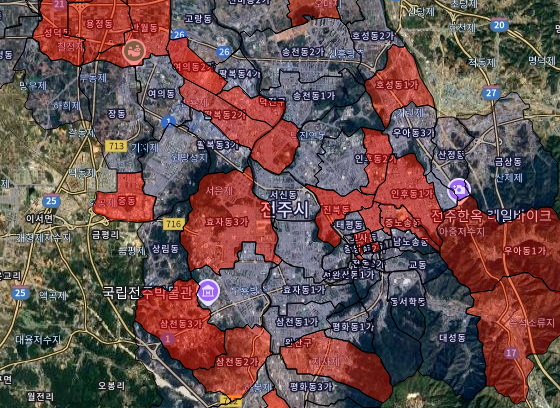

In [45]:
#import sys
#del sys.modules['folium']
#import folium

lat, lon = 35.82895, 127.14828
zoom_size = 12

tiles = "http://mt0.google.com/vt/lyrs=y&hl=ko&x={x}&y={y}&z={z}"

attr = "Google"


m = folium.Map(location=(35.78814, 127.11444), tiles=tiles, attr = attr, zoom_start=12)

folium.GeoJson(result_df).add_to(m)

driver_path = "/home/jhahn/chromedriver-linux64/chromedriver"

service = Service(executable_path=driver_path)

webdriver_options = webdriver.ChromeOptions()
webdriver_options.add_argument('--headless')
webdriver_options.add_argument('--no-sandbox')
webdriver_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=webdriver_options)


img_data = m._to_png(5, driver=driver)
img = Image.open(io.BytesIO(img_data))
img = crop(img,500,500,200,500)
img.save('output/4.png')
img



In [5]:
import random
# (5) 구 별 법정동 시각화
# 지도 생성
# 위도, 경도

# 시각화 할 경계선 색상 지정
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']

# FeatureGroup 사전 생성
layer_dict = {}
layer = None
# 각 경계선을 지도에 추가
for idx, row in result_df[result_df['군구'] == '전주시'].iterrows():
    gu_name = row['군구']
    dong_name = row['EMD_NM']
    polygon_wkt = row['geometry']
    '''
    if gu_name in layer_dict:
        layer = layer_dict[gu_name]
    else:
        # 해당 구이름에 대한 FeatureGroup가 없으면 새로 생성
        layer = folium.FeatureGroup(name=gu_name,show=False)
        layer_dict[gu_name] = layer
        layer.add_to(m)
    '''
    color = colors[len(layer_dict) % len(colors)]
    fillColor = 'green'
    fillOpacity = 0.1
    v = random.random()
    if v > 0.7 or dong_name=='평화동2가' :
        fillColor = 'red'
        fillOpacity = v
        #color = 'red'

        print(dong_name, fillColor,fillOpacity)


    t1 = folium.GeoJson(polygon_wkt, 
                    style_function=lambda feature, color=color: {
                        'fillColor': fillColor, #채우기 색상
                        'fillOpacity': fillOpacity, #채우기 투명도
                        'color': color, # 테두리 색상
                        'weight': 1, #테두리 두께
                        'opacity': 1  # 테두리 투명도
                    },
                        tooltip=f'법정동: {dong_name}{fillColor}')
   
    t1.add_to(m)
    
# folium.LayerControl 추가한 뒤, 지도 표시
#folium.LayerControl(collapsed=False).add_to(m)
#folium.LatLngPopup().add_to(m)
m


# html파일로 저장
#m.save("법정동시각화_231210.html")

평화동2가 red 0.41759854027147947
중노송동 red 0.9950389396050013
호성동1가 red 0.94534344294893
전미동2가 red 0.96125259866249
삼천동2가 red 0.7040429147729947
태평동 red 0.8525282233624812
원당동 red 0.8011827808521702
다가동1가 red 0.7865156988952945
중화산동2가 red 0.940697960766246
진북동 red 0.9098127571507166
덕진동1가 red 0.9056202932721303
경원동3가 red 0.8125043338200204
호성동3가 red 0.884129257705299
서서학동 red 0.9437416972399131
동서학동 red 0.7049840814139209
인후동1가 red 0.8970741127296036
대성동 red 0.9936235832834015
중앙동1가 red 0.9444409230428543
다가동4가 red 0.8086492339908392
중동 red 0.9423482260170676
석구동 red 0.7114899955114778
평화동3가 red 0.9963849260635896
전미동1가 red 0.9384543333865204
여의동2가 red 0.9839786546932487
송천동1가 red 0.8777751396407848
도덕동 red 0.9417193441925538
중앙동4가 red 0.91701229875298
전동3가 red 0.9583298729905169
남노송동 red 0.7570475525829248
다가동2가 red 0.8173534896165684
중앙동2가 red 0.7422795726901084
금상동 red 0.901861345666226
인후동2가 red 0.9221854858816116
다가동3가 red 0.7053138421505719
